In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting
import constants as C

%matplotlib widget

In [2]:
model1 = edl.ProtonLPB(1e-1, 5, 11, 60, 11)
model1b = edl.ProtonLPB(1e-1, 10, 11, 60, 11)
model2 = edl.ProtonLPB(1e-2, 5, 11, 60, 11)
model3 = edl.ProtonLPB(1e-3, 5, 11, 60, 11)
ins_sol = model1b.spatial_profiles_ins(p_h=7, tol=1e-2)

Sweep from pH 2.00 to 6.99. Maximum relative residual: 5.06262e-05.


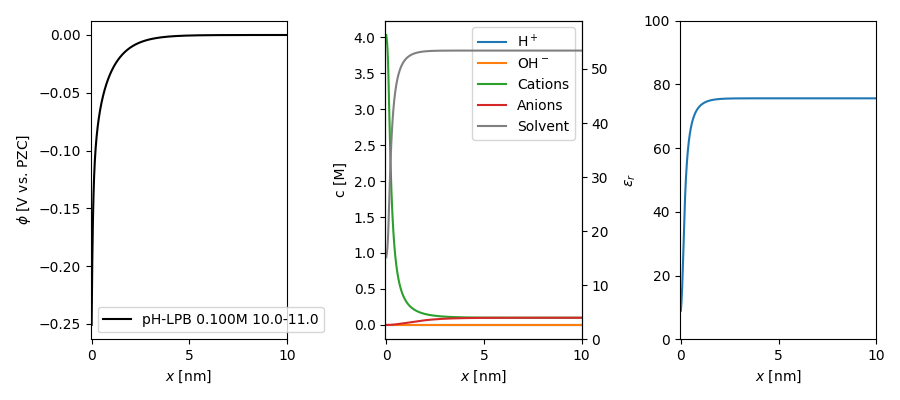

In [3]:
xmin = -0.05
xmax = 10

fig, ax = plotting.plot_solution(ins_sol, xmin, xmax, logscale=False)
plt.show()

In [4]:
p_h = np.linspace(0.5, 7, 700)
sweep_sol1 = model1.sweep_ins(p_h, tol=1e-2)
sweep_sol1b = model1b.sweep_ins(p_h, tol=1e-1)
sweep_sol2 = model2.sweep_ins(p_h, tol=1e-2)
sweep_sol3 = model3.sweep_ins(p_h, tol=1e-2)

Sweep from pH 2.00 to 0.50. Maximum relative residual: 1.96309e-08.
Sweep from pH 2.00 to 7.00. Maximum relative residual: 3.86891e-05.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 2.12580e-08.
Sweep from pH 2.00 to 7.00. Maximum relative residual: 6.44067e-04.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 1.86029e-08.
Sweep from pH 2.00 to 7.00. Maximum relative residual: 2.72524e-06.
Sweep from pH 2.00 to 0.50. Maximum relative residual: 1.85288e-08.
Sweep from pH 2.00 to 7.00. Maximum relative residual: 3.17091e-07.


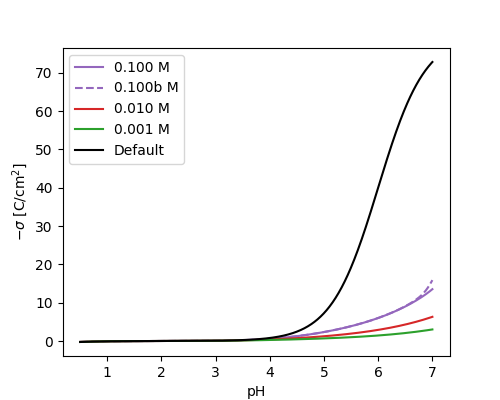

In [5]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol1.charge * 1e2, color='tab:purple', label=f'{1e-1:.3f} M')
ax.plot(p_h, -sweep_sol1b.charge * 1e2, '--', color='tab:purple', label=f'{1e-1:.3f}b M')
ax.plot(p_h, -sweep_sol2.charge * 1e2, color='tab:red', label=f'{1e-2:.3f} M')
ax.plot(p_h, -sweep_sol3.charge * 1e2, color='tab:green', label=f'{1e-3:.3f} M')

c_h = 10 ** (-p_h)
sigma = C.E_0 * C.N_SITES_SILICA \
            * (c_h**2 - C.K_SILICA_A * C.K_SILICA_B) \
            / (C.K_SILICA_A * C.K_SILICA_B + C.K_SILICA_B * c_h + c_h**2)
ax.plot(p_h, -sigma * 1e2, color='black', label=f'Default')

ax.set_ylabel(r'$-\sigma$ [C/cm$^2$]')
ax.set_xlabel('pH')

ax.legend()

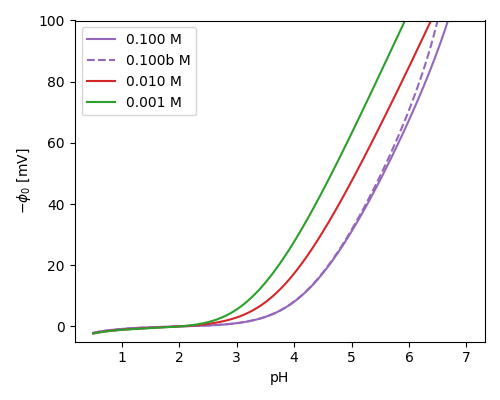

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol1.phi * 1e3, color='tab:purple', label=f'{1e-1:.3f} M')
ax.plot(p_h, -sweep_sol1b.phi * 1e3, '--', color='tab:purple', label=f'{1e-1:.3f}b M')
ax.plot(p_h, -sweep_sol2.phi * 1e3, color='tab:red', label=f'{1e-2:.3f} M')
ax.plot(p_h, -sweep_sol3.phi * 1e3, color='tab:green', label=f'{1e-3:.3f} M')

ax.set_ylim([-5, 100])
# ax.set_xlim([1, 5])
ax.set_ylabel(r'$-\phi_0$ [mV]')
ax.set_xlabel('pH')
ax.legend()
plt.tight_layout()

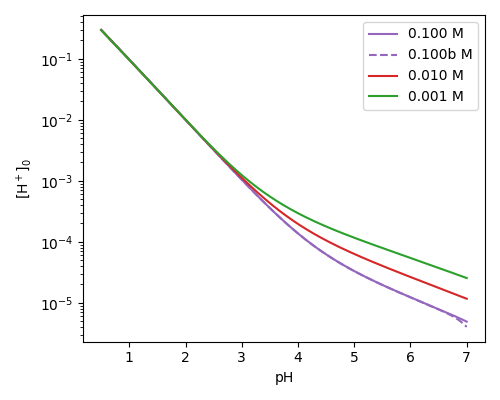

In [22]:
fig, ax = plt.subplots(figsize=(5,4))

# c_sioh2plus = 1 / (1 + 10 ** (np.log(C.K_SILICA_B) + p_h)) * C.N_SITES_SILICA / 1e3/ C.N_A

ax.plot(p_h, sweep_sol1.c_h, color='tab:purple', label=f'{1e-1:.3f} M')
ax.plot(p_h, sweep_sol1b.c_h, '--', color='tab:purple', label=f'{1e-1:.3f}b M')
ax.plot(p_h, sweep_sol2.c_h, color='tab:red', label=f'{1e-2:.3f} M')
ax.plot(p_h, sweep_sol3.c_h, color='tab:green', label=f'{1e-3:.3f} M')

ax.set_ylabel(r'[H$^+]_0$') # /[H$^+]_\mathrm{bulk}
ax.set_xlabel('pH')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()